In [4]:
import pandas as pd
import numpy as np
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge
from bert_score import score
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\shadm\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
file_path="GEMINI_DS_GPT.csv"
df=pd.read_csv(file_path)

Drop Missing Values 

In [7]:
df=df.dropna()

In [8]:
rouge=Rouge()

Function to compute evaluation metrics 

In [9]:
def evaluate(reference, candidate):
    bleu = sentence_bleu([reference.split()], candidate.split())
    rouge_scores = rouge.get_scores(candidate, reference)[0]
    return bleu, rouge_scores['rouge-1']['f'], rouge_scores['rouge-2']['f'], rouge_scores['rouge-l']['f']


In [10]:
scores = {'Model': [], 'BLEU': [], 'ROUGE-1': [], 'ROUGE-2': [], 'ROUGE-L': []}
models = ['DeepSeek', 'Gemini (flash 2.0 )', 'ChatGPT']

In [11]:
for model in models:
    bleu_scores, rouge1_scores, rouge2_scores, rougeL_scores = [], [], [], []
    for _, row in df.iterrows():
        bleu, r1, r2, rL = evaluate(row['review_content'], row[model])
        bleu_scores.append(bleu)
        rouge1_scores.append(r1)
        rouge2_scores.append(r2)
        rougeL_scores.append(rL)
    
    scores['Model'].append(model)
    scores['BLEU'].append(np.mean(bleu_scores))
    scores['ROUGE-1'].append(np.mean(rouge1_scores))
    scores['ROUGE-2'].append(np.mean(rouge2_scores))
    scores['ROUGE-L'].append(np.mean(rougeL_scores))


c:\Users\shadm\AppData\Local\Programs\Python\Python312\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\shadm\AppData\Local\Programs\Python\Python312\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\shadm\AppData\Local\Programs\Python\Python312\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lowe

In [12]:
scores_df = pd.DataFrame(scores)

In [13]:
P, R, F1 = {}, {}, {}
for model in models:
    P[model], R[model], F1[model] = score(df[model].tolist(), df['review_content'].tolist(), lang="en", rescale_with_baseline=True)
    scores_df.loc[scores_df['Model'] == model, 'BERTScore'] = np.mean(F1[model].numpy())

c:\Users\shadm\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\shadm\.cache\huggingface\hub\models--roberta-large. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are 

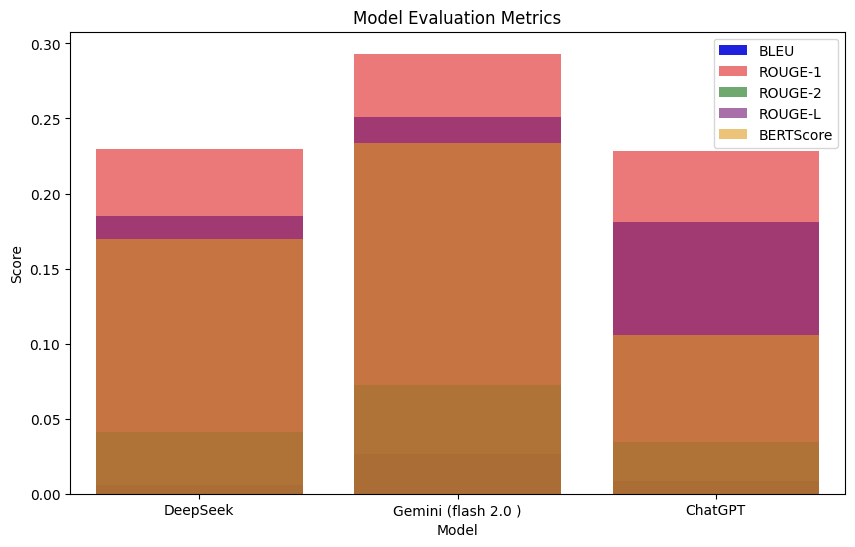

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='BLEU', data=scores_df, label='BLEU', color='blue')
sns.barplot(x='Model', y='ROUGE-1', data=scores_df, label='ROUGE-1', color='red', alpha=0.6)
sns.barplot(x='Model', y='ROUGE-2', data=scores_df, label='ROUGE-2', color='green', alpha=0.6)
sns.barplot(x='Model', y='ROUGE-L', data=scores_df, label='ROUGE-L', color='purple', alpha=0.6)
sns.barplot(x='Model', y='BERTScore', data=scores_df, label='BERTScore', color='orange', alpha=0.6)
plt.legend()
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.show()

In [ ]:


print("BLEU")
print(scores_df['BLEU'])
print("ROUGE-1")
print(scores_df['ROUGE-1'])
print("ROUGE-2")
print(scores_df['ROUGE-2'])
print("ROUGE-L")
print(scores_df['ROUGE-L'])
print("BERTScore")
print(scores_df['BERTScore'])


BLEU
0    0.005871
1    0.026185
2    0.008775
Name: BLEU, dtype: float64
ROUGE-1
0    0.229831
1    0.293159
2    0.228508
Name: ROUGE-1, dtype: float64
ROUGE-2
0    0.041013
1    0.072338
2    0.034733
Name: ROUGE-2, dtype: float64
ROUGE-L
0    0.185268
1    0.251048
2    0.181052
Name: ROUGE-L, dtype: float64
BERTScore
0    0.169692
1    0.233868
2    0.105837
Name: BERTScore, dtype: float32


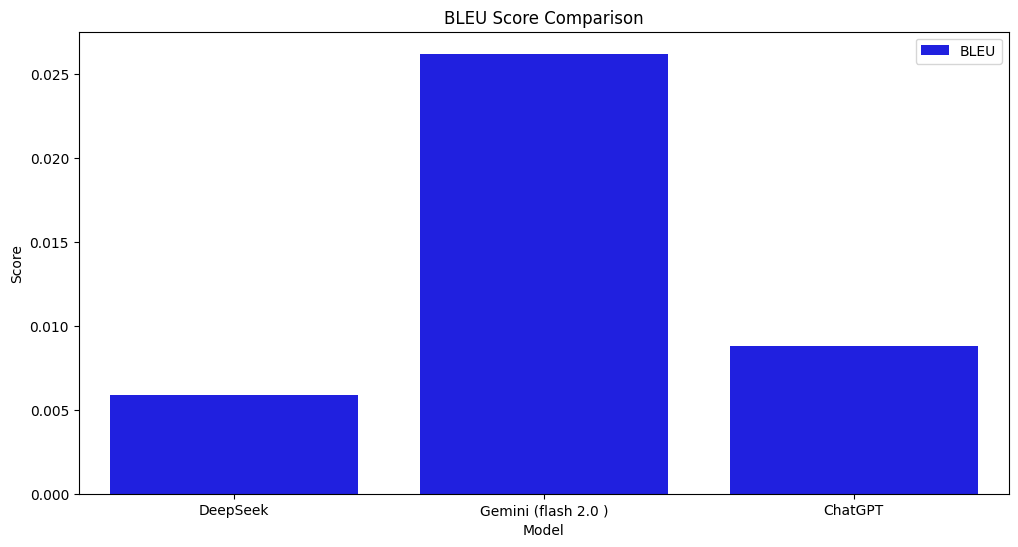

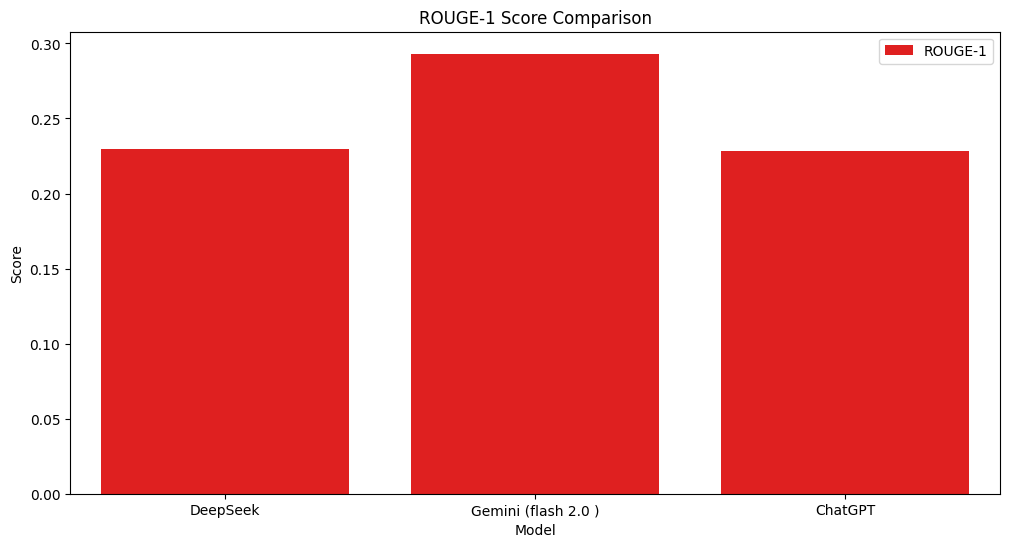

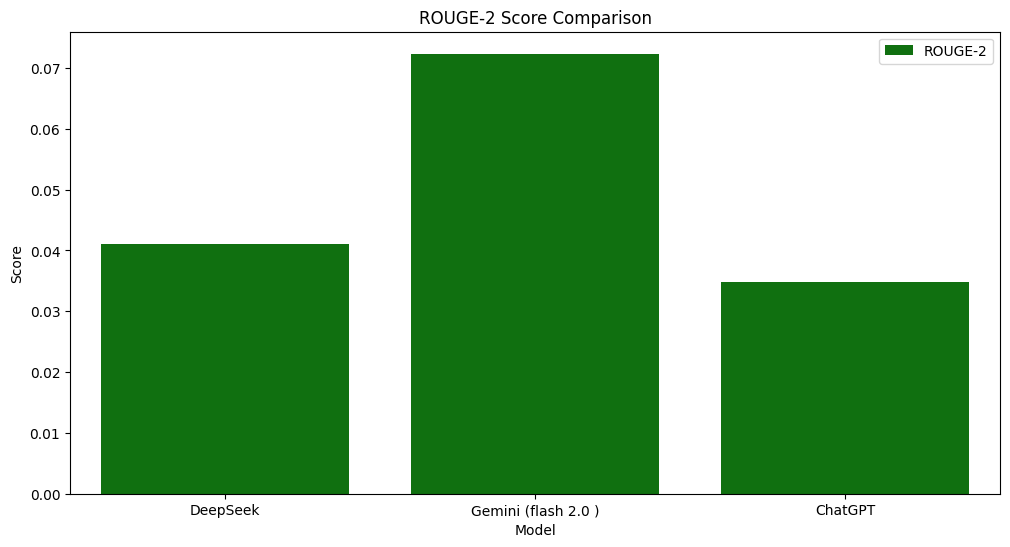

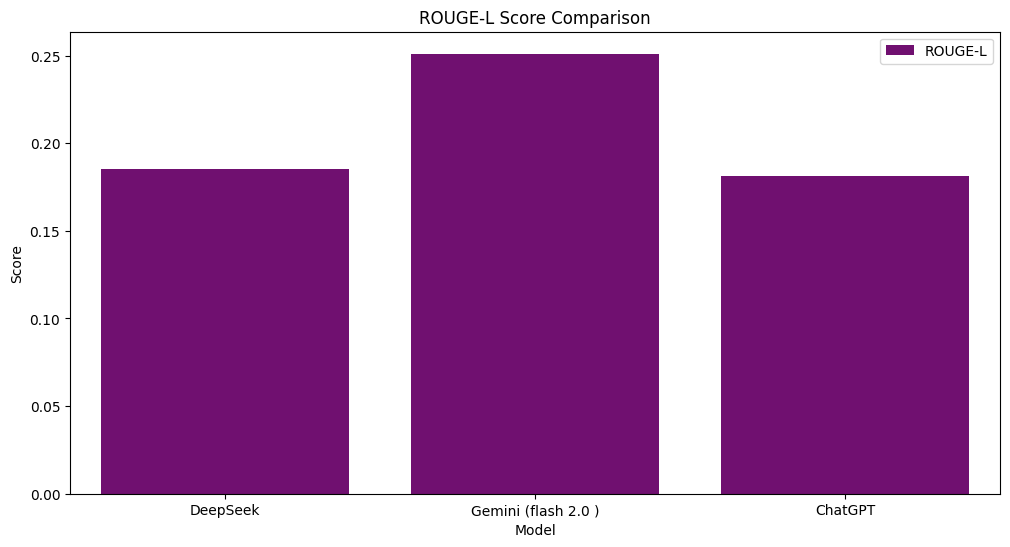

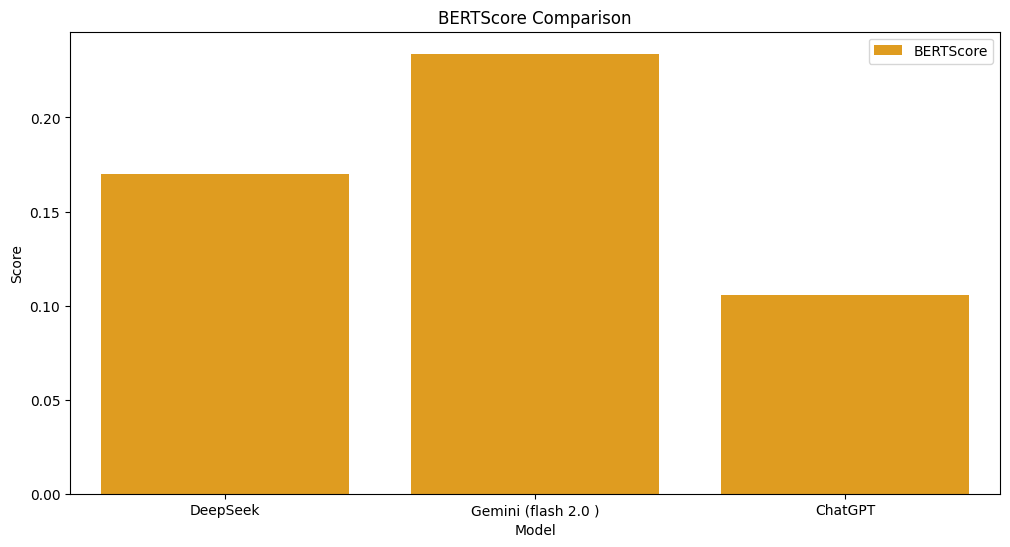

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='BLEU', data=scores_df, label='BLEU', color='blue')
plt.title("BLEU Score Comparison")
plt.ylabel("Score")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='ROUGE-1', data=scores_df, label='ROUGE-1', color='red')
plt.title("ROUGE-1 Score Comparison")
plt.ylabel("Score")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='ROUGE-2', data=scores_df, label='ROUGE-2', color='green')
plt.title("ROUGE-2 Score Comparison")
plt.ylabel("Score")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='ROUGE-L', data=scores_df, label='ROUGE-L', color='purple')
plt.title("ROUGE-L Score Comparison")
plt.ylabel("Score")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='BERTScore', data=scores_df, label='BERTScore', color='orange')
plt.title("BERTScore Comparison")
plt.ylabel("Score")
plt.show()

In [20]:
from fpdf import FPDF

In [22]:

graphs = []
metrics = ['BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'BERTScore']
colors = ['blue', 'red', 'green', 'purple', 'orange']

for metric, color in zip(metrics, colors):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y=metric, data=scores_df, label=metric, color=color)
    plt.title(f"{metric} Score Comparison")
    plt.ylabel("Score")
    image_path = f"{metric}_comparison.png"
    plt.savefig(image_path)
    graphs.append(image_path)
    plt.close()


pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Model Evaluation Report", ln=True, align='C')

pdf.ln(10)
pdf.set_font("Arial", size=10)
for index, row in scores_df.iterrows():
    pdf.cell(200, 10, txt=f"{row['Model']}: BLEU={row['BLEU']:.4f}, ROUGE-1={row['ROUGE-1']:.4f}, ROUGE-2={row['ROUGE-2']:.4f}, ROUGE-L={row['ROUGE-L']:.4f}, BERTScore={row['BERTScore']:.4f}", ln=True)


for graph in graphs:
    pdf.add_page()
    pdf.image(graph, x=10, y=20, w=180)

pdf_path = "model_evaluation_report.pdf"
pdf.output(pdf_path)


df.to_csv("evaluation_results.csv", index=False)

print("Evaluation results saved to:", pdf_path)


Evaluation results saved to: model_evaluation_report.pdf
